In [1]:
import os
import sys
sys.path.append('..')

from scripts.utils.processing import *
from scripts.data_utils.loaders import *
from scripts.utils.visualizations import *
from scripts.data_utils.feature_engineering import *

%load_ext autoreload
%autoreload 2

In [2]:
file_path = r"../data/AlphaCare_Risk_Insurance_data.csv"
cleaned_df = load_data(file_path)
cleaned_df.shape

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\data_utils\loaders.py:8: DtypeWarning: Columns (4,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path, sep=sep)


Data loaded successfully.


(1000098, 52)

In [3]:
# Add Risk and Profit Margin columns in the datafram
processed_df = generate_risk_metrics(cleaned_df)
df = processed_df
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin,Risk
0,145249,12827,2015-03-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0
1,145249,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0
3,145255,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,512.848070,0.0
5,145247,12827,2015-01-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0,3.256435,0.0
6,145247,12827,2015-04-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0,50.474737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0,2.315000,0.0


In [4]:
# dvc add data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv
# git commit -am "Update dataset with new features"
# dvc push
# dvc diff

output_path = r'../data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv'
save_data(processed_df, output_path)

In [5]:

{province: compute_metric(df, "Province", province, "Risk") for province in df["Province"].unique()}


{'Gauteng': 0.42888927480749073,
 'KwaZulu-Natal': 0.26474645146103315,
 'Mpumalanga': 0.3926976895015563,
 'Eastern Cape': 0.23558851652254742,
 'Western Cape': 0.3417503129575668,
 'Limpopo': 0.3487120371329607,
 'North West': 0.28534843459632137,
 'Free State': 0.10620929937799883,
 'Northern Cape': 0.20383085693985306}

In [6]:
{province: compute_metric(df, "Province", province, "ProfitMargin") for province in df["Province"].unique()}

{'Gauteng': -16.310013495537937,
 'KwaZulu-Natal': -2.8291987124145663,
 'Mpumalanga': 25.281857550947223,
 'Eastern Cape': 40.298308551922055,
 'Western Cape': -4.502239837304071,
 'Limpopo': 30.28660812470893,
 'North West': 21.12256851323422,
 'Free State': 43.052653655165315,
 'Northern Cape': 62.32982841118795}

In [7]:
{province: compute_metric(df, "Province", province, "TotalClaims") for province in df["Province"].unique()}

{'Gauteng': 116.19985948038912,
 'KwaZulu-Natal': 120.61807185720362,
 'Mpumalanga': 64.29562855754487,
 'Eastern Cape': 68.347433829777,
 'Western Cape': 105.835833522323,
 'Limpopo': 55.07762639148261,
 'North West': 62.29159176156182,
 'Free State': 44.83730672770931,
 'Northern Cape': 24.565058680189345}

In [8]:
{gender: compute_metric(df, "Gender", gender, "Risk") for gender in df["Gender"].unique()}

{'Not specified': 0.3479044184892278,
 'Male': 0.34885236062626185,
 'Female': 0.4919788674989967,
 'Notspecified': 0.502840465839676}

In [9]:
{gender: compute_metric(df, "Gender", gender, "ProfitMargin") for gender in df["Gender"].unique()}

{'Not specified': -1.4779384400411064,
 'Male': 17.45117170935069,
 'Female': 16.804688523031988,
 'Notspecified': 68.75006202681055}

In [10]:
{gender: compute_metric(df, "Gender", gender, "TotalClaims") for gender in df["Gender"].unique()}

{'Not specified': 101.63231148598003,
 'Male': 64.31982789332058,
 'Female': 72.64318242727857,
 'Notspecified': 109.60681404875521}

1. Testing Risk Differences Across Provinces
- Null Hypothesis: There are no risk differences across provinces
- Alternative Hypothesis: There are significant differences in risk (claims)

In [11]:
df['Province'].unique()

array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape',
       'Western Cape', 'Limpopo', 'North West', 'Free State',
       'Northern Cape'], dtype=object)

In [12]:
# A/B Testing: Risk Differences between Provinces Comparison
province_group_a, province_group_b = segment_data(df, "Province", ["Gauteng"], ["WesternCape"])
perform_t_test(province_group_a, province_group_b, "Risk")

{'stat': nan, 'p_value': nan, 'significant': False}

In [13]:
# Extract risk groups based on Province and perform ANOVA test across groups
province_groups = [group["Risk"].values for _, group in df.groupby("Province")]

# Risk Across Provinces with ANOVA
perform_anova_test(*province_groups)

{'stat': 4.988778295471582,
 'p_value': 3.3310233679703755e-06,
 'significant': True}

2. Testing Risk Differences Between Zip Codes
- Null Hypothesis: Risk (claims) is independent of zip codes
- Alternative Hypothesis: There are differences in risk across zip codes

In [14]:
# A/B Testing: Risk Differences for Zip/Postal Codes (Categorical comparison)
contingency_table = generate_contingency_table(df, "PostalCode", "Risk", 0.5)
perform_chi2_test(contingency_table)

{'stat': 1152.8326065972738,
 'p_value': 4.8003518557879056e-11,
 'significant': True}

In [15]:
# A/B Testing: Risk Differences for prominent Zip/Postal Codes (Categorical comparison)
filtered_df = df[df["PostalCode"].isin(df["PostalCode"].value_counts().index[:10])]
contingency_table = generate_contingency_table(filtered_df, "PostalCode", "Risk", 0.5)
perform_chi2_test(contingency_table)

{'stat': 48.2725980220106,
 'p_value': 2.2712616375971555e-07,
 'significant': True}

3. Testing Margin Differences Between Zip Codes
- Null Hypothesis: Margins do not vary between zip codes
- Alternative Hypothesis: There are significant margin differences

In [16]:
df['PostalCode'].value_counts()[:3], df['PostalCode'].value_counts()[-3:]

(PostalCode
 2000    90944
 122     27898
 299     16731
 Name: count, dtype: int64,
 PostalCode
 7340    1
 7456    1
 6655    1
 Name: count, dtype: int64)

In [17]:
# A/B Testing: t-test for Margin Differences between Postal/Zip Codes
zipcode_group_a, zipcode_group_b = segment_data(df, "PostalCode", [2000], [122])
perform_t_test(zipcode_group_a, zipcode_group_b, "ProfitMargin")

{'stat': 0.6421862817465027,
 'p_value': 0.5207561363156676,
 'significant': False}

In [18]:
# Extract profit margin groups based on PostalCode
postal_code_groups = [group["ProfitMargin"].values for _, group in df.groupby("PostalCode")]

# Perform ANOVA test for Margin Across Zip Codes
perform_anova_test(*postal_code_groups)

{'stat': 0.8397459167039115,
 'p_value': 0.9997627033248128,
 'significant': False}

4. Testing Risk Differences Between Genders
- Null Hypothesis: There are no differences in risk between males and females
- Alternative Hypothesis: There are significant differences in risk between genders

In [19]:
# A/B Testing: Mann-Whitney U Test for Gender Comparison
gender_group_a, gender_group_b = segment_data(df, "Gender", ["Male"], ["Female"])
perform_mannwhitneyu_test(gender_group_a, gender_group_b, "Risk")

{'stat': 32908460.0, 'p_value': 0.6350800943780405, 'significant': False}

In [20]:
# Risk Differences (Gender)
perform_t_test(gender_group_a, gender_group_b, "Risk")

# Interpretation: A high p-value (0.5495) indicates that there is no statistically significant difference 
# in risk between men and women based on Risk. This means we fail to reject the null hypothesis.


{'stat': -0.5985543131195025,
 'p_value': 0.549506376964734,
 'significant': False}

In [21]:
# Margin Differences (Gender)
perform_t_test(gender_group_a, gender_group_b, "Risk")

{'stat': -0.5985543131195025,
 'p_value': 0.549506376964734,
 'significant': False}

In [22]:
perform_mannwhitneyu_test(gender_group_a, gender_group_b, "Risk")


{'stat': 32908460.0, 'p_value': 0.6350800943780405, 'significant': False}

In [23]:
# Extract risk groups based on Gender and perform ANOVA test across groups
gender_groups = [group["Risk"].values for _, group in df.groupby("Gender")]

# Risk Across Genders with ANOVA
perform_anova_test(*gender_groups)

{'stat': 0.69256685263642, 'p_value': 0.556437617329897, 'significant': False}

In [24]:
# Extract profit margin groups based on Gender
gender_groups = [group["ProfitMargin"].values for _, group in df.groupby("Gender")]

# Perform ANOVA test for Margin Across Genders
perform_anova_test(*gender_groups)

{'stat': 1.1328135567042752,
 'p_value': 0.3341757425243139,
 'significant': False}

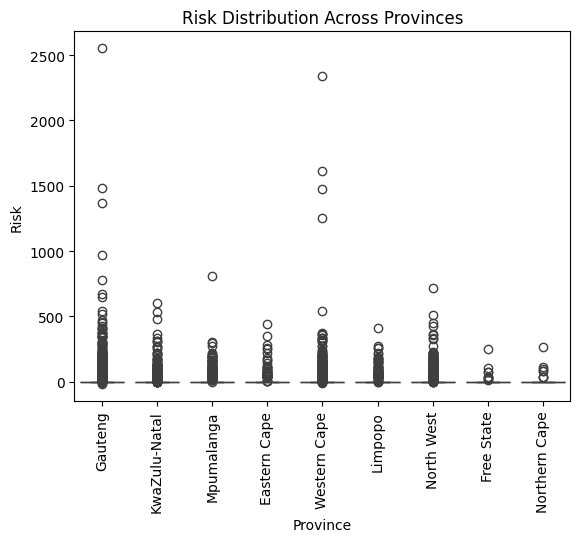

In [25]:
plot_boxplot(data=df, x_column="Province", y_column="Risk", title="Risk Distribution Across Provinces")

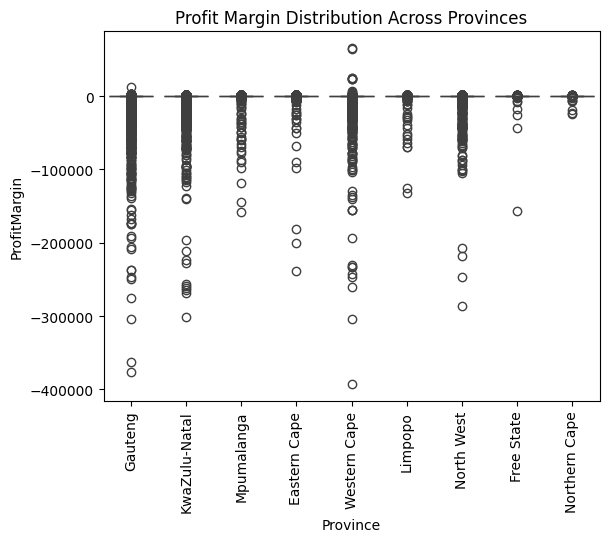

In [26]:
plot_boxplot(data=df, x_column="Province", y_column="ProfitMargin", title="Profit Margin Distribution Across Provinces")

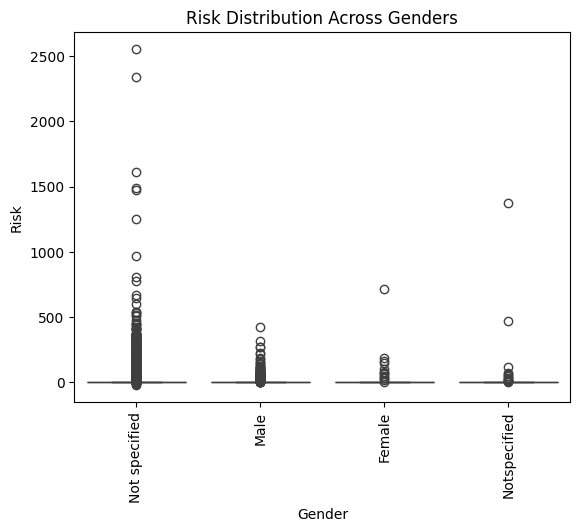

In [27]:
plot_boxplot(data=df, x_column="Gender", y_column="Risk", title="Risk Distribution Across Genders")